In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/Classroom/Machine Learning/headbrain.csv'

In [4]:
df=pd.read_csv(file_path)
print(df.head())

   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [5]:
x = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

In [6]:
mean_x = np.mean(x)
mean_y = np.mean(y)
n = len(x)
xy = x * y
x2 = x * x

In [7]:
numerator = np.sum(xy) - n * mean_x * mean_y
denominator = np.sum(x2) - n * mean_x**2
w1 = numerator / denominator
w0 = mean_y - w1 * mean_x
print(f"Calculated coefficients: w0 = {w0:.4f}, w1 = {w1:.4f}")

Calculated coefficients: w0 = 325.5734, w1 = 0.2634


In [8]:
def predict(x):
  return w0 + w1 * x

In [9]:
y_pred = predict(x)

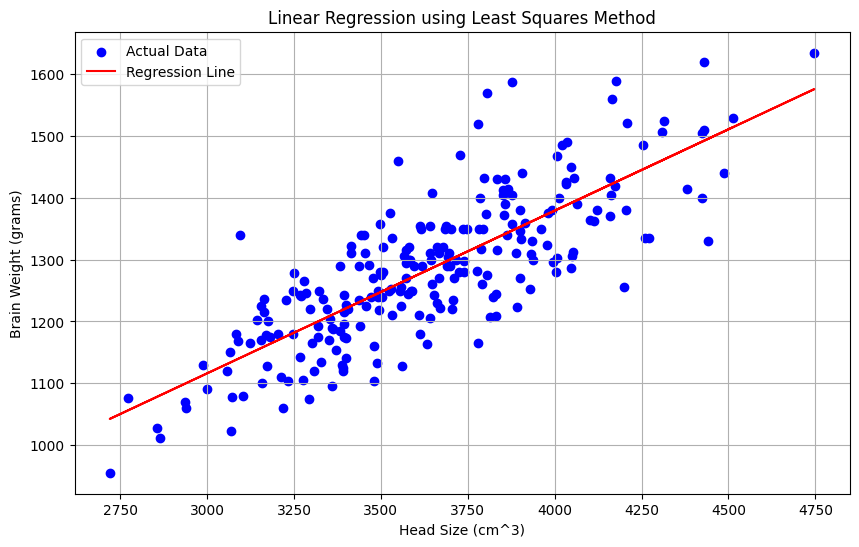

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.title('Linear Regression using Least Squares Method')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (Least Squares): {mse:.2f}")

Mean Squared Error (Least Squares): 5201.38


In [12]:
x_reshaped = x.reshape(-1, 1)
reg = LinearRegression()
reg.fit(x_reshaped, y)
y_sklearn_pred = reg.predict(x_reshaped)

In [13]:
print(f"\nScikit-learn Coefficients:")
print(f"w0 (Intercept): {reg.intercept_:.4f}")
print(f"w1 (Slope): {reg.coef_[0]:.4f}")


Scikit-learn Coefficients:
w0 (Intercept): 325.5734
w1 (Slope): 0.2634


In [14]:
mse_sklearn = mean_squared_error(y, y_sklearn_pred)
print(f"Mean Squared Error (Scikit-learn): {mse_sklearn:.2f}")

Mean Squared Error (Scikit-learn): 5201.38


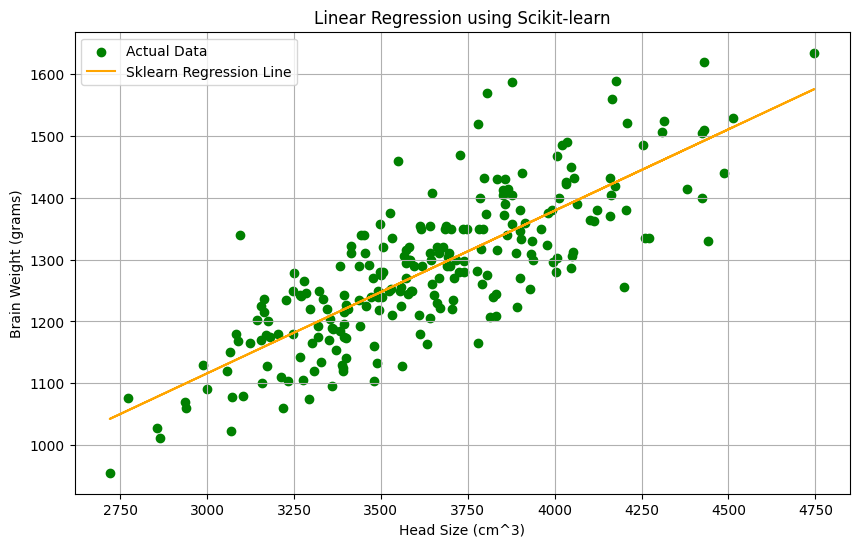

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='green', label='Actual Data')
plt.plot(x, y_sklearn_pred, color='orange', label='Sklearn Regression Line')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.title('Linear Regression using Scikit-learn')
plt.legend()
plt.grid(True)
plt.show()